<a href="https://colab.research.google.com/github/bhavya2810/Bhavya_INFO5731/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Reading**

In [22]:
import pandas as pd
data = pd.read_csv("/content/final_data.csv")
data

,Contribution,Annotation 1,Annotation 2,Unnamed: 3
0,"We introduce in this paper a novel method, tha...",New Algorithm/ Method,New Algorithm/ Method,NaN
1,we pro-pose to build multi-task datasets for t...,Dataset Creation,Dataset Creation,NaN
2,Hence our model can grasp\nuseful word-level s...,Model Optimization,Model Optimization,NaN
3,The above operations provide a\nwealth of reso...,Resources,Resources,NaN
4,"For document\nlevel, we reused last year’s Eng...",Performance Evaluation,Performance Evaluation,NaN
...,...,...,...,...
3099,we address a sentiment classification task for...,Performance Evaluation,Performance Evaluation,NaN
3100,We analyze the ambiguity of hashtag usages and...,Performance Evaluation,Performance Evaluation,NaN
3101,we explore the potential for generalizing clas...,Theory Proposal,Theory Proposal,NaN
3102,"we present SQUADRUN, a new dataset that combin...",Dataset Creation,Dataset Creation,NaN


In [2]:
 data['Annotation 1'] = data['Annotation 1'].apply(lambda x: str(x))
 data['Annotation 2'] = data['Annotation 2'].apply(lambda x: str(x))

# **Kappa Score**

In [3]:
from sklearn import metrics
kappa_value = metrics.cohen_kappa_score(data['Annotation 1'], data['Annotation 2'])

In [4]:
kappa_value

0.878422658938022

# **Data Cleaning**

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
 data['Lower Case'] = data['Contribution'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [8]:
data['Remove Punc'] = data['Lower Case'].str.replace('[^\w\s]','')

In [9]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['After Stop words Removal'] = data['Remove Punc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [10]:
from nltk.tokenize import sent_tokenize
data['sentence tokenize'] = data['After Stop words Removal'].apply(lambda x: sent_tokenize(x))

In [11]:
from textblob import TextBlob
data['Tokenization'] = data['After Stop words Removal'].apply(lambda x: TextBlob(x).words)

In [12]:
from textblob import Word
import nltk
nltk.download('wordnet')

data['After Lemmatization'] = data['Tokenization'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [13]:
data.head()

,Contribution,Annotation 1,Annotation 2,Unnamed: 3,Lower Case,Remove Punc,After Stop words Removal,sentence tokenize,Tokenization,After Lemmatization
0,"We introduce in this paper a novel method, tha...",New Algorithm/ Method,New Algorithm/ Method,NaN,"we introduce in this paper a novel method, tha...",we introduce in this paper a novel method that...,introduce paper novel method call multitask su...,[introduce paper novel method call multitask s...,"[introduce, paper, novel, method, call, multit...","['introduce', 'paper', 'novel', 'method', 'cal..."
1,we pro-pose to build multi-task datasets for t...,Dataset Creation,Dataset Creation,NaN,we pro-pose to build multi-task datasets for t...,we propose to build multitask datasets for the...,propose build multitask datasets news tweets d...,[propose build multitask datasets news tweets ...,"[propose, build, multitask, datasets, news, tw...","['propose', 'build', 'multitask', 'datasets', ..."
2,Hence our model can grasp\nuseful word-level s...,Model Optimization,Model Optimization,NaN,hence our model can grasp useful word-level se...,hence our model can grasp useful wordlevel sem...,hence model grasp useful wordlevel semantic in...,[hence model grasp useful wordlevel semantic i...,"[hence, model, grasp, useful, wordlevel, seman...","['hence', 'model', 'grasp', 'useful', 'wordlev..."
3,The above operations provide a\nwealth of reso...,Resources,Resources,NaN,the above operations provide a wealth of resou...,the above operations provide a wealth of resou...,operations provide wealth resources allow mode...,[operations provide wealth resources allow mod...,"[operations, provide, wealth, resources, allow...","['operations', 'provide', 'wealth', 'resources..."
4,"For document\nlevel, we reused last year’s Eng...",Performance Evaluation,Performance Evaluation,NaN,"for document level, we reused last year’s engl...",for document level we reused last years englis...,document level reused last years englishfrench...,[document level reused last years englishfrenc...,"[document, level, reused, last, years, english...","['document', 'level', 'reused', 'last', 'years..."


New Algorithm/ Method            840
Theory Proposal                  739
Model Proposal                   424
Performance Evaluation           373
Model Optimization               217
Dataset Creation                 214
Algorithm/Method Optimization    144
Applications                      77
Resources                         76
Name: Annotation 1, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


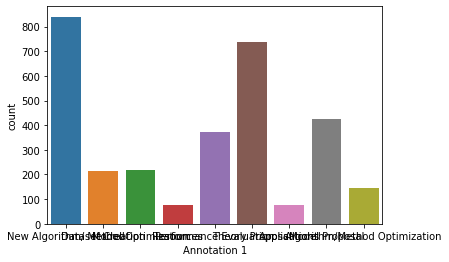

In [14]:
import seaborn as sns
print(data['Annotation 1'].value_counts())
sns.countplot(data['Annotation 1'])

# **TF-IDF Feature Selection**

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidfvector = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
Tfidfvector.fit(data['After Lemmatization'])
x_values = Tfidfvector.transform(data['After Lemmatization'])
encoder = LabelEncoder()
y_values = encoder.fit_transform(data['Annotation 1'])

# **Splitting Dataset into Training and Testing**

In [16]:
from sklearn import model_selection
X_train, x_test, y_train, y_test = model_selection.train_test_split(x_values, y_values, test_size=0.33)

# **Navie Bayes**

In [17]:
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
nb = naive_bayes.MultinomialNB()
nb.fit(X_train, y_train)
predicted_nb = nb.predict(x_test)

accuracy = accuracy_score(y_test, predicted_nb) * 100
f1 = f1_score(y_test, predicted_nb, average='macro') *100
precision = precision_score(y_test, predicted_nb, average='macro') *100
recall = recall_score (y_test, predicted_nb, average='macro') *100
print('F1-score:', f1)
print('accuracy score:', accuracy)
print('precision score:', precision)
print('recall score:', recall)

F1-score: 19.24273665771363
accuracy score: 39.707317073170735
precision score: 28.723531060690387
recall score: 20.210525023052174


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Non Linear SVM**

In [18]:
from sklearn import svm
C = 1.0
svm_model = svm.SVC(kernel='linear', C=C)
svm_model.fit(X_train, y_train)
predicted = svm_model.predict(x_test)

In [19]:
accuracy = accuracy_score(y_test, predicted) * 100
f1 = f1_score(y_test, predicted, average='macro') *100
precision = precision_score(y_test, predicted, average='macro') *100
recall = recall_score (y_test, predicted, average='macro') *100
print('F1-score:', f1)
print('accuracy score:', accuracy)
print('precision score:', precision)
print('recall score:', recall)

F1-score: 28.254161708199092
accuracy score: 44.29268292682927
precision score: 33.83114461545834
recall score: 28.655668589822437


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Random Forest Classifier**

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred=clf.predict(x_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred, average='macro') *100
precision = precision_score(y_test, y_pred, average='macro') *100
recall = recall_score (y_test, y_pred, average='macro') *100
print('F1-score:', f1)
print('accuracy score:', accuracy)
print('precision score:', precision)
print('recall score:', recall)

F1-score: 29.31264724488143
accuracy score: 47.609756097560975
precision score: 29.256467837990645
recall score: 30.38185217194177
